# Librerías:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import holidays
import calendar

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
bike_sharing_df = pd.read_csv('../data/processed/bike_sharing_cleaned.csv')

# Análisis de correlaciones / patrones:

In [3]:
def create_correlation_heatmap(df, num_cols):
    """
    Generar Heatmap para visualizar la matriz de correlación 
    entre las variables numéricas.

    Args:
        df: dataframe de entrada
        num_cols: lista de nombres de columnas numéricas
        figsize: tupla para el tamaño de la figura (width, height)
    """    
    corr_matrix = df[num_cols].corr()

    plt.figure(figsize=(12, 8))
    
    sns.heatmap(
        corr_matrix, 
        annot=True,              
        fmt=".2f",               
        cmap='rocket',         
        linewidths=.5,           
        linecolor='black',       
        cbar_kws={'label': 'Coeficiente de Correlación'}
    )
    
    plt.title('Mapa de Calor de Correlación (Variables Numéricas)', fontsize=12)
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout() 

    plt.show()

In [4]:
def get_num_cols(df):
    num_cols = df.select_dtypes(exclude = 'object').columns.tolist()

    return num_cols

In [5]:
num_cols = get_num_cols(bike_sharing_df)

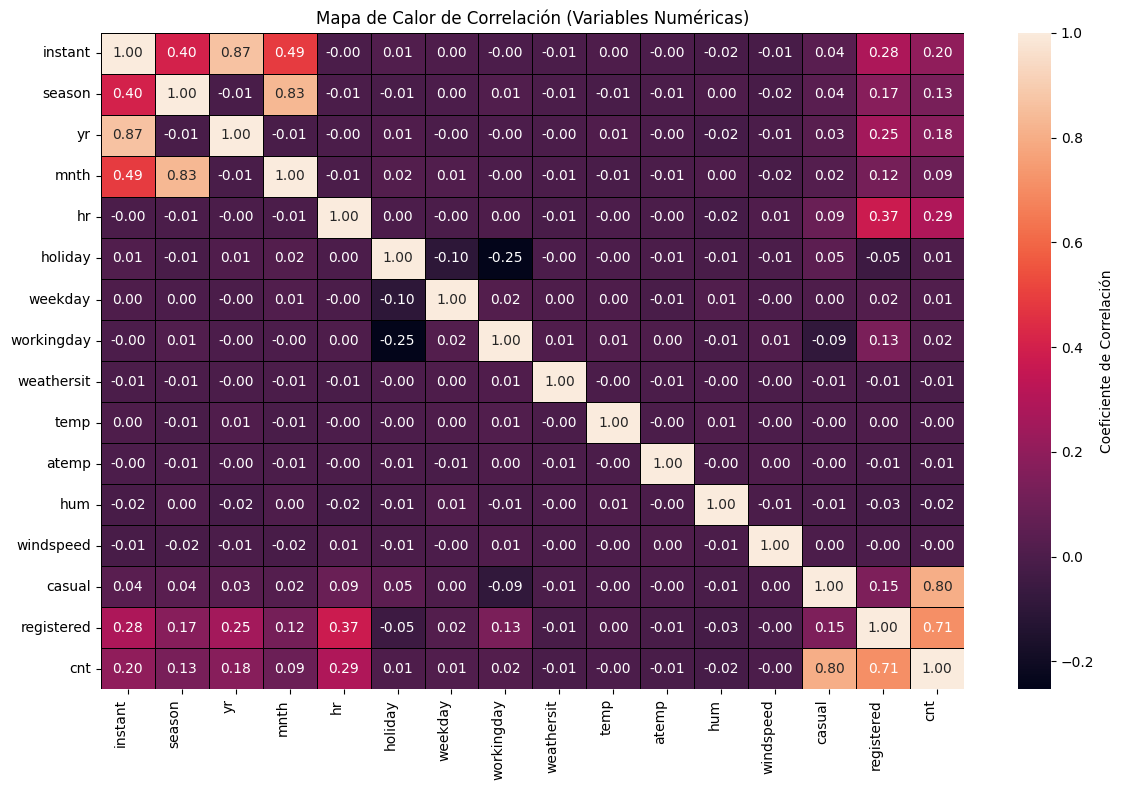

In [6]:
create_correlation_heatmap(bike_sharing_df, num_cols)

/var/folders/dt/m1wqqf692qndl4tszyqhty640000gn/T/ipykernel_47832/4152536430.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


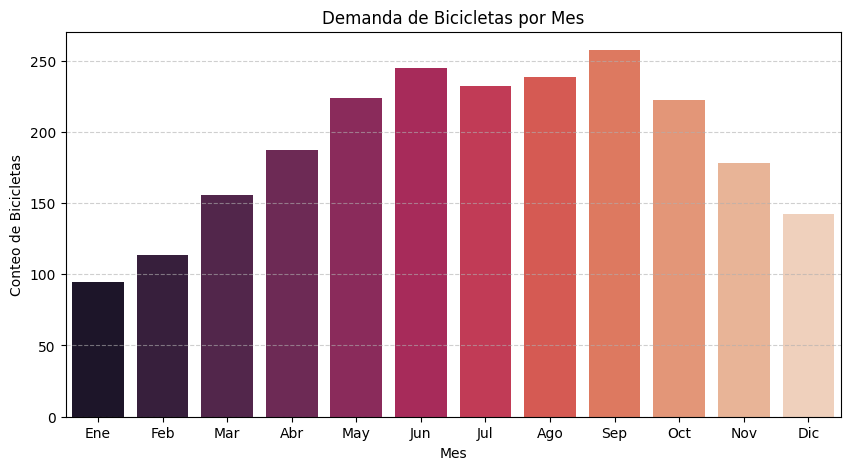

In [7]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x='mnth', 
    y='cnt',
    data=bike_sharing_df, 
    palette='rocket',
    errorbar=None 
)

month_labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(ticks=range(12), labels=month_labels)
plt.title('Demanda de Bicicletas por Mes', fontsize=12)
plt.xlabel('Mes')
plt.ylabel('Conteo de Bicicletas')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

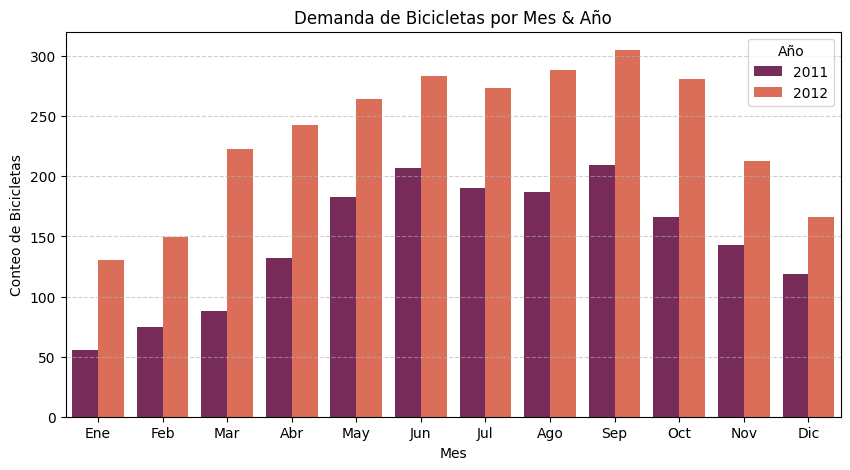

In [8]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x='mnth', 
    y='cnt', 
    hue='yr',
    data=bike_sharing_df, 
    palette='rocket',
    errorbar=None 
)

month_labels = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(ticks=range(12), labels=month_labels)
plt.legend(title='Año', labels=['2011', '2012'])
plt.title('Demanda de Bicicletas por Mes & Año', fontsize=12)
plt.xlabel('Mes')
plt.ylabel('Conteo de Bicicletas')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

/var/folders/dt/m1wqqf692qndl4tszyqhty640000gn/T/ipykernel_47832/1561675215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(


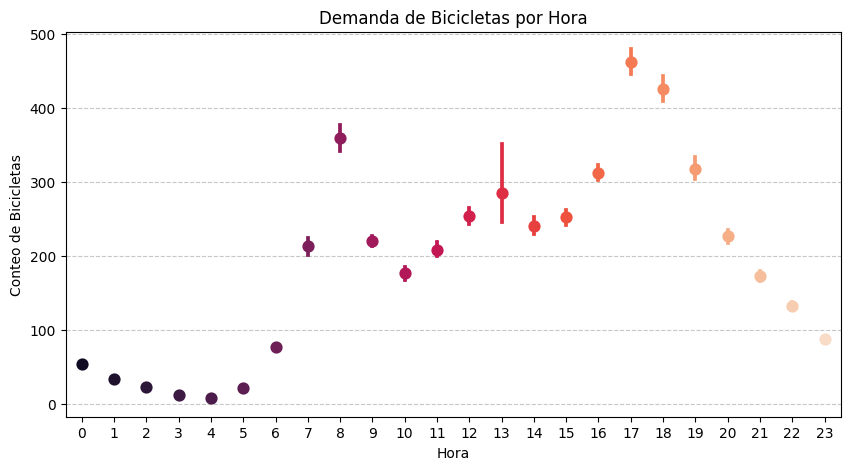

In [9]:
plt.figure(figsize=(10, 5))

sns.pointplot(
    x='hr', 
    y='cnt',
    data=bike_sharing_df, 
    errorbar=('ci', 95),
    palette='rocket'
)

plt.title('Demanda de Bicicletas por Hora')
plt.xlabel('Hora')
plt.ylabel('Conteo de Bicicletas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

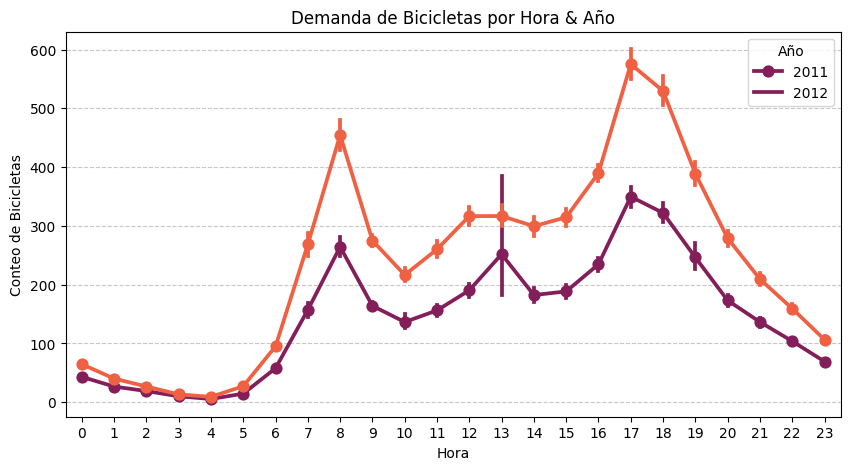

In [10]:
plt.figure(figsize=(10, 5))

sns.pointplot(
    x='hr', 
    y='cnt', 
    hue='yr',
    data=bike_sharing_df, 
    errorbar=('ci', 95),
    palette='rocket'
)

plt.legend(title='Año', labels=['2011', '2012'])
plt.title('Demanda de Bicicletas por Hora & Año', fontsize=12)
plt.xlabel('Hora')
plt.ylabel('Conteo de Bicicletas')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

/var/folders/dt/m1wqqf692qndl4tszyqhty640000gn/T/ipykernel_47832/1825908768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


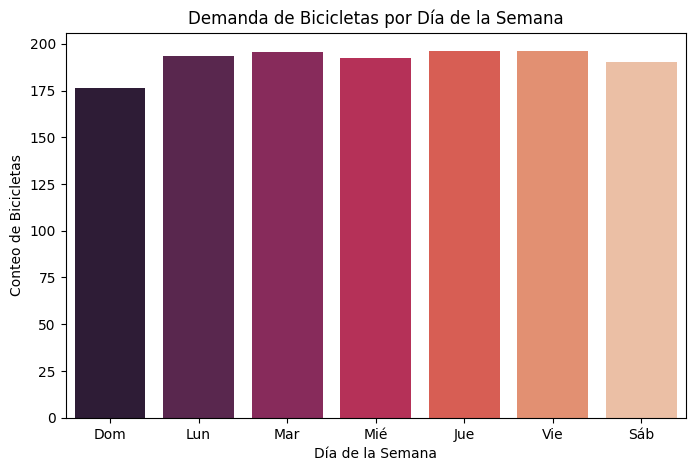

In [11]:
plt.figure(figsize=(8, 5))

sns.barplot(
    x='weekday', 
    y='cnt', 
    data=bike_sharing_df, 
    palette='rocket', 
    errorbar=None
)

weekday_labels = ['Dom', 'Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb']
plt.xticks(ticks=range(7), labels=weekday_labels, rotation=0)
plt.title('Demanda de Bicicletas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Conteo de Bicicletas')

plt.show()

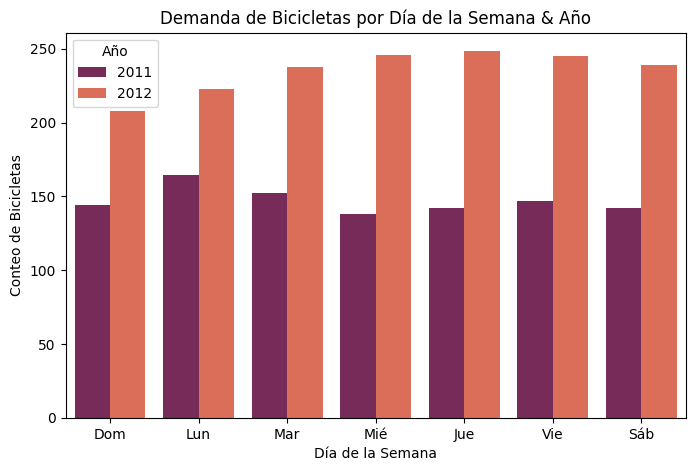

In [12]:
plt.figure(figsize=(8, 5))

sns.barplot(
    x='weekday', 
    y='cnt', 
    hue='yr',
    data=bike_sharing_df, 
    palette='rocket', 
    errorbar=None
)

weekday_labels = ['Dom', 'Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb']
plt.xticks(ticks=range(7), labels=weekday_labels, rotation=0)
plt.legend(title='Año', labels=['2011', '2012'])
plt.title('Demanda de Bicicletas por Día de la Semana & Año')
plt.xlabel('Día de la Semana')
plt.ylabel('Conteo de Bicicletas')

plt.show()

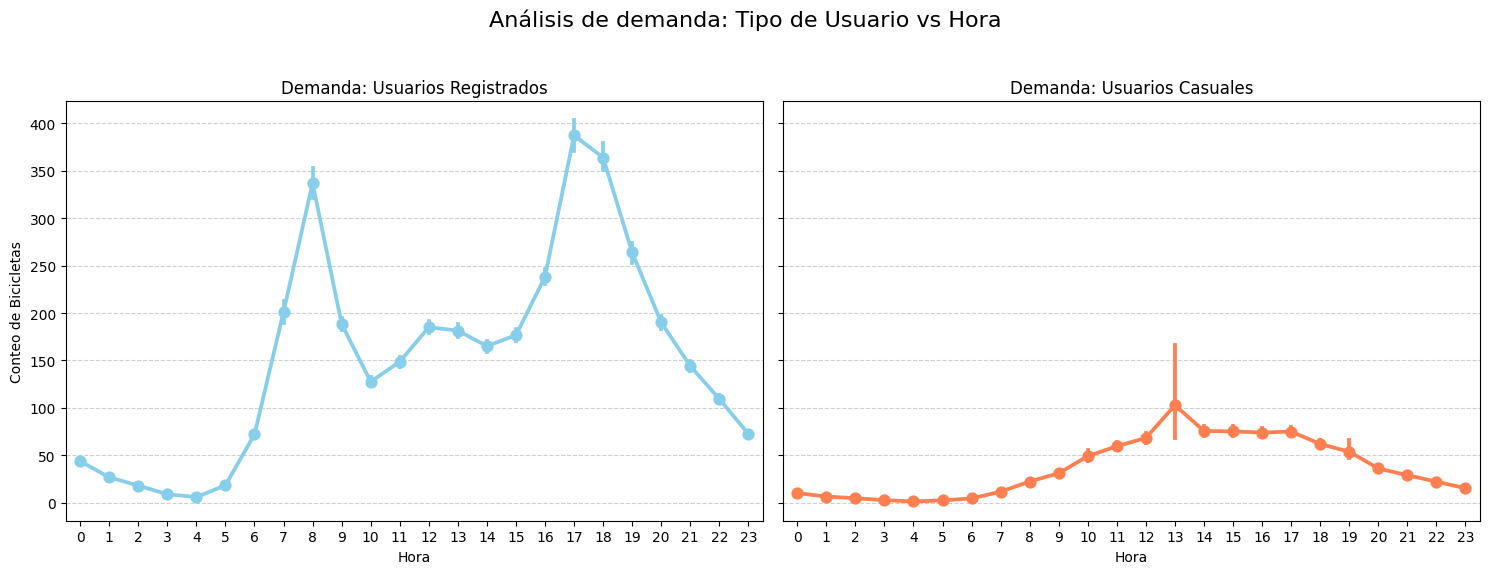

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

sns.pointplot(x='hr', y='registered', data=bike_sharing_df, errorbar=('ci', 95), ax=ax[0], color='skyblue')
ax[0].set_title('Demanda: Usuarios Registrados')
ax[0].set_xlabel('Hora')
ax[0].set_ylabel('Conteo de Bicicletas')
ax[0].grid(axis='y', linestyle='--', alpha=0.6)

sns.pointplot(x='hr', y='casual', data=bike_sharing_df, errorbar=('ci', 95), ax=ax[1], color='coral')
ax[1].set_title('Demanda: Usuarios Casuales')
ax[1].set_xlabel('Hora')
ax[1].set_ylabel('Conteo de Bicicletas')
ax[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Análisis de demanda: Tipo de Usuario vs Hora', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

/var/folders/dt/m1wqqf692qndl4tszyqhty640000gn/T/ipykernel_47832/900532733.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.pointplot(x='hr', y='registered', hue='yr', data=bike_sharing_df, errorbar=('ci', 95), ax=ax[0], color='skyblue')
/var/folders/dt/m1wqqf692qndl4tszyqhty640000gn/T/ipykernel_47832/900532733.py:9: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:coral'` for the same effect.

  sns.pointplot(x='hr', y='casual', hue='yr', data=bike_sharing_df, errorbar=('ci', 95), ax=ax[1], color='coral')


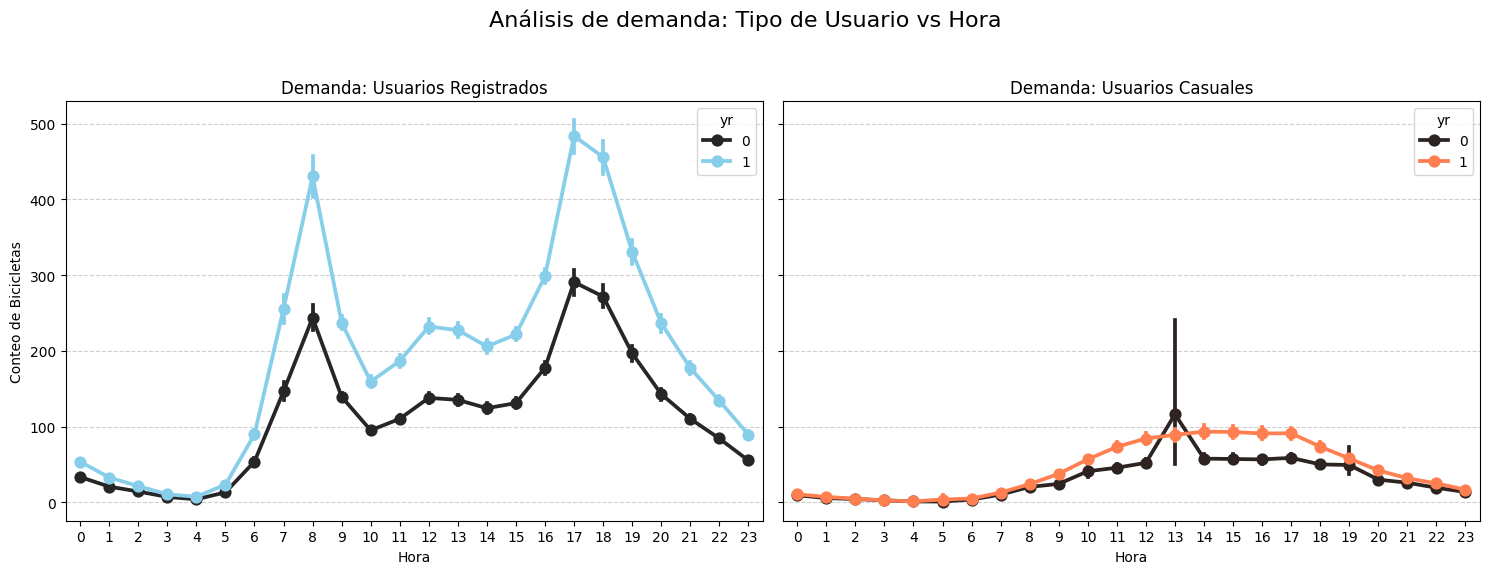

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

sns.pointplot(x='hr', y='registered', hue='yr', data=bike_sharing_df, errorbar=('ci', 95), ax=ax[0], color='skyblue')
ax[0].set_title('Demanda: Usuarios Registrados')
ax[0].set_xlabel('Hora')
ax[0].set_ylabel('Conteo de Bicicletas')
ax[0].grid(axis='y', linestyle='--', alpha=0.6)

sns.pointplot(x='hr', y='casual', hue='yr', data=bike_sharing_df, errorbar=('ci', 95), ax=ax[1], color='coral')
ax[1].set_title('Demanda: Usuarios Casuales')
ax[1].set_xlabel('Hora')
ax[1].set_ylabel('Conteo de Bicicletas')
ax[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Análisis de demanda: Tipo de Usuario vs Hora', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

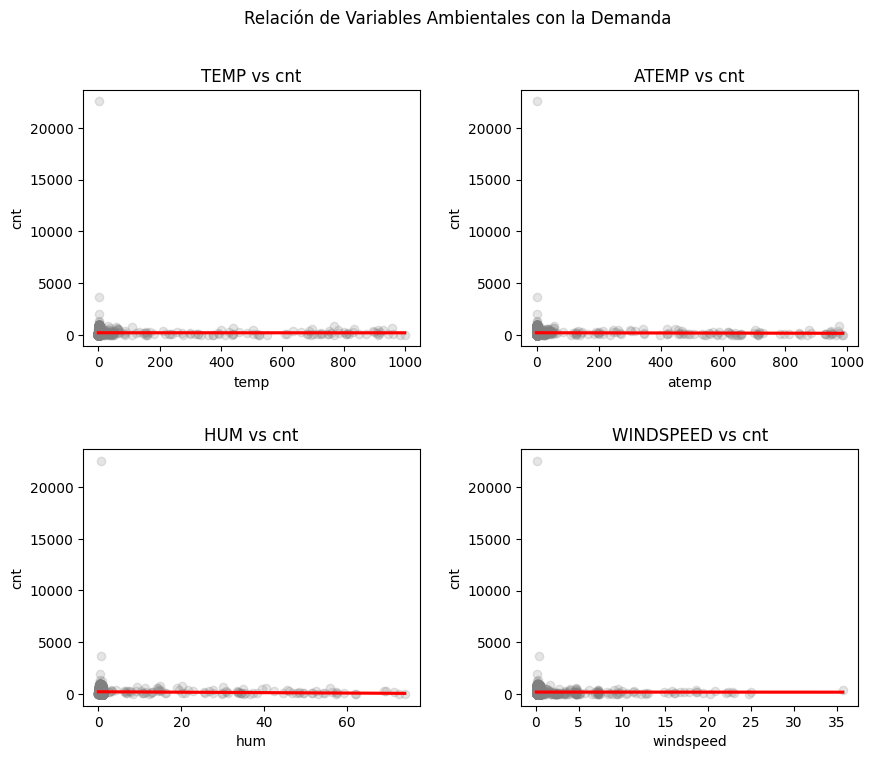

In [15]:
key_variable = 'cnt'
environmental_cols = ['temp', 'atemp', 'hum', 'windspeed']

plot_cols = environmental_cols  

n_cols = 2
n_rows = (len(plot_cols) + n_cols - 1) // n_cols 

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
fig.suptitle(f'Relación de Variables Ambientales con la Demanda', fontsize=12)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

axes = axs.ravel()

for i, column in enumerate(plot_cols):
    
    sns.regplot(
        x=bike_sharing_df[column], 
        y=bike_sharing_df[key_variable], 
        ax=axes[i], 
        scatter_kws={'alpha': 0.2, 'color': 'gray'}, 
        line_kws={'color': 'red'}                    
    )
    axes[i].set_title(f'{column.upper()} vs {key_variable}', fontsize=12)

for j in range(len(plot_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Notas:
- Septiembre es el mes con mayor demanda
- La demanda incremento considerablemente de 2011 a 2012
- En general todos los patrones se mantienen de un año a otro, excepto por los días de la semana: los lunes había una demanda mayor en 2011, es muy observable esta diferencia dado que en 2012 se regularizó la demanda en todos los días. En 2011 es muy notorio que únicamente los lunes había un pico de renta de bicicletas
- La demanda promedio de bicicletas aumenta con base en el horario laboral. Los principales picos están a la hora de entrada y salida de oficina estándar: 8 am, 4-6 pm. Asimismo se observa un pico en la demanda a la hora de la comida: 1 pm
- Parece haber un ligero incremento en la demanda los días Jueves y Viernes, sin embargo todos los días mantienen la demanda promedio
- El único día con una ligera demanda menor son los domingos
- La mayoría de los usuarios son registrados
- La demanda de usuarios casuales incrementa a la 1 pm, parece ser por la hora de comida estándar
- Variables ambientales: si bien la demanda parece ser un poco más alta cuando las condiciones climáticas son apropiadas (variables con parámetros bajos), no parece existir una correlación alta

# Ingeniería de Características:

In [16]:
def log_transform(df, log_cols):
    for col in log_cols:
        df[f'{col}_log'] = np.log1p(df[col])

    return df

In [17]:
def cyclic_transform(df, cyclic_cols):
    for col in cyclic_cols:
        if col == 'hr':
            period = 24
        elif col == 'mnth':
            period = 12
        elif col == 'weekday':
            period = 7
        else:
            continue

        df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / period)
        df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / period)

    df.drop(columns=cyclic_cols, inplace=True)

    return df

In [18]:
def ohe_transform(df, cat_cols):
    df = pd.get_dummies(
        df, 
        columns=cat_cols, 
        drop_first=True,
        dtype=int
    )

    return df

In [19]:
log_transform_cols = ['cnt', 'casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed'] # columnas con alto sesgo
cyclic_cols = ['mnth', 'hr', 'weekday']
categorical_cols = ['season', 'yr', 'weathersit', 'holiday', 'workingday']

bike_sharing_df = log_transform(bike_sharing_df, log_transform_cols)
bike_sharing_df = cyclic_transform(bike_sharing_df, cyclic_cols)
bike_sharing_df = ohe_transform(bike_sharing_df, categorical_cols)
bike_sharing_df.to_csv('../data/processed/bike_sharing_transformed.csv', index=False)